## Pakistan House Prices - 2023
Data from: https://www.kaggle.com/datasets/manjitbaishya001/house-prices-2023/data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid")

In [35]:
df = pd.read_csv('house_prices.csv', index_col = 0)

First let's have a look at data types and formats

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99499 entries, 0 to 168445
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  99499 non-null  object 
 1   price          99499 non-null  int64  
 2   location       99499 non-null  object 
 3   city           99499 non-null  object 
 4   baths          99499 non-null  int64  
 5   purpose        99499 non-null  object 
 6   bedrooms       99499 non-null  int64  
 7   Area_in_Marla  99499 non-null  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 6.8+ MB


In [37]:
df.head()

,property_type,price,location,city,baths,purpose,bedrooms,Area_in_Marla
0,Flat,10000000,G-10,Islamabad,2,For Sale,2,4.0
1,Flat,6900000,E-11,Islamabad,3,For Sale,3,5.6
2,House,16500000,G-15,Islamabad,6,For Sale,5,8.0
3,House,43500000,Bani Gala,Islamabad,4,For Sale,4,40.0
4,House,7000000,DHA Defence,Islamabad,3,For Sale,3,8.0


In [39]:
df['city'].value_counts()

city
Karachi       37066
Lahore        26221
Islamabad     22243
Rawalpindi    11738
Faisalabad     2231
Name: count, dtype: int64

In [40]:
df['property_type'].value_counts()

property_type
House            58169
Flat             26658
Upper Portion     8539
Lower Portion     5549
Penthouse          255
Room               241
Farm House          88
Name: count, dtype: int64

<Axes: xlabel='property_type', ylabel='count'>

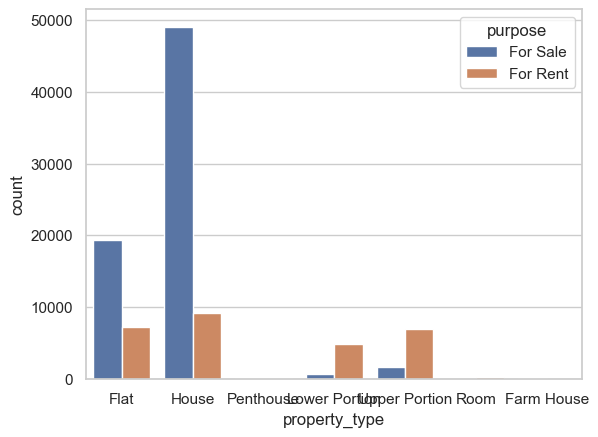

In [4]:
sns.countplot(x='property_type', hue = 'purpose', data = df)

In [7]:
df['location'].nunique()

1389

I think we will drop location, there is to many unique values

In [38]:
df = df.drop('location', axis = 1)

<Axes: xlabel='city', ylabel='count'>

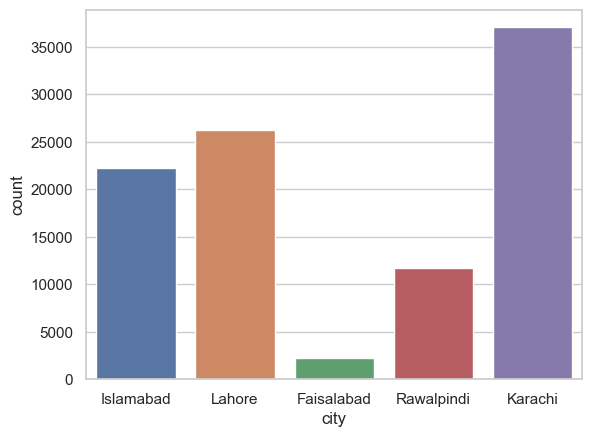

In [5]:
sns.countplot(x = "city", data = df)

<Axes: xlabel='city', ylabel='count'>

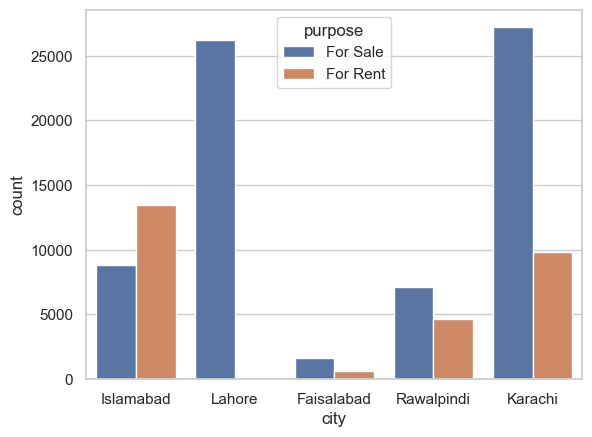

In [6]:
sns.countplot(x='city', hue = 'purpose', data = df)

## Focusing on 'For Sale

There is no point comparing data for rent with for sale. I opted with for sale.

In [8]:
df_sale = df[df['purpose'] == 'For Sale']

<Axes: xlabel='city', ylabel='count'>

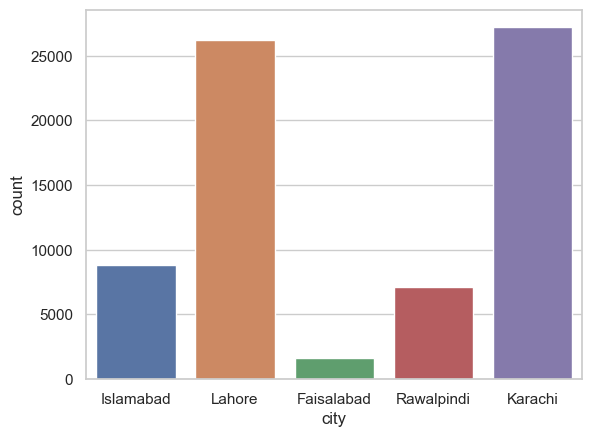

In [14]:
sns.countplot(x='city', data = df_sale)

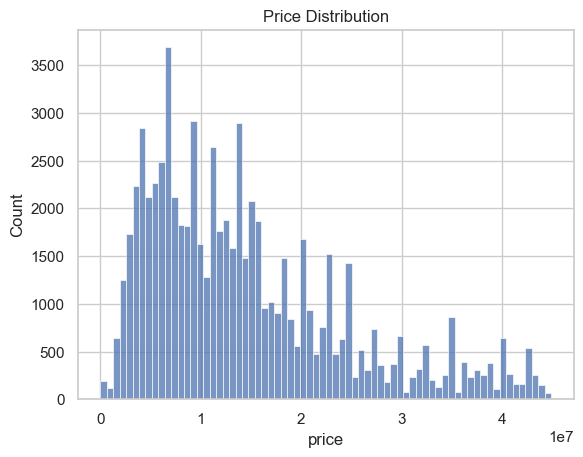

In [13]:
sns.histplot(df_sale['price'])
plt.title('Price Distribution')

Text(0.5, 1.0, 'Price vs. Property Type')

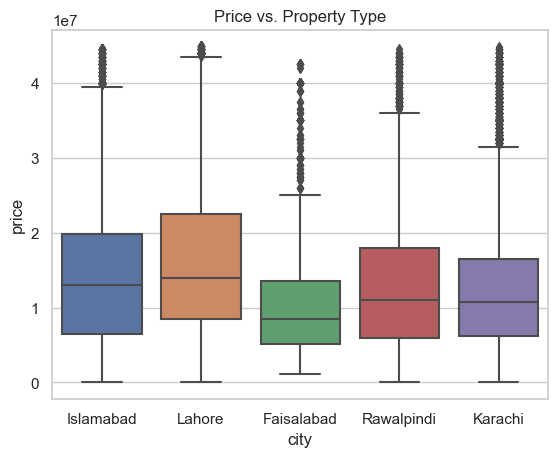

In [32]:
sns.boxplot(x='city', y='price', data=df_sale)
plt.title('Price Distribution in Different Cities')

Text(0.5, 1.0, 'Price Distribution in Different Cities')

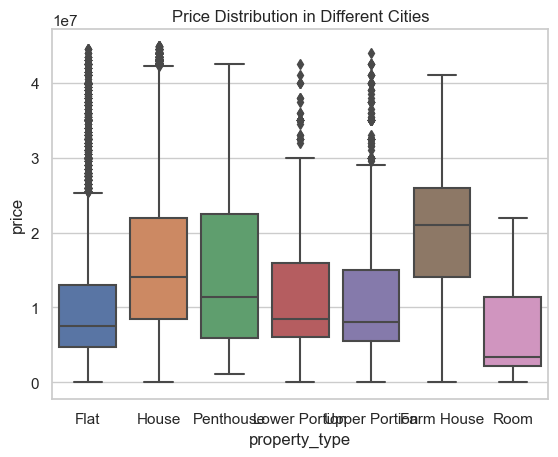

In [33]:
sns.boxplot(x='property_type', y='price', data=df_sale)
plt.title('Price vs. Property Type')

C:\Users\Adam\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


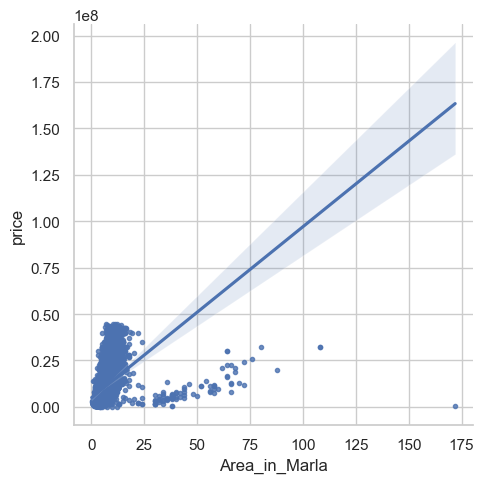

C:\Users\Adam\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


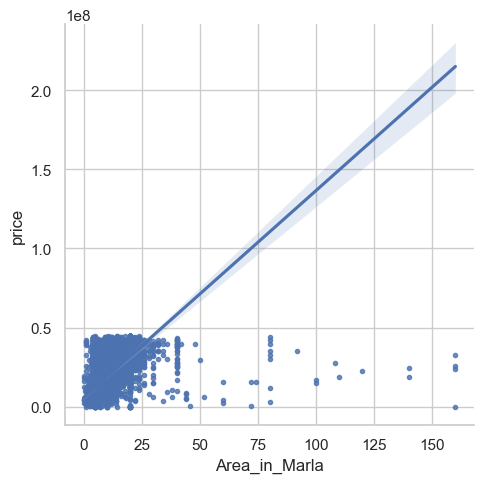

In [43]:
for i in ['Flat', 'House']:
    sns.lmplot(x='Area_in_Marla', y  = 'price', markers='.', 
               data = df_sale[df_sale['property_type'] == i])
    plt.show()

As we can see there are few really large flats and houses. I think it's a mistake. Marla equals a little more then 25 square meters. That means 50 marla = 1250 square meters. I don't believe in flats this large so we will cut flats at 15, houses at 30 Marlas.

C:\Users\Adam\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


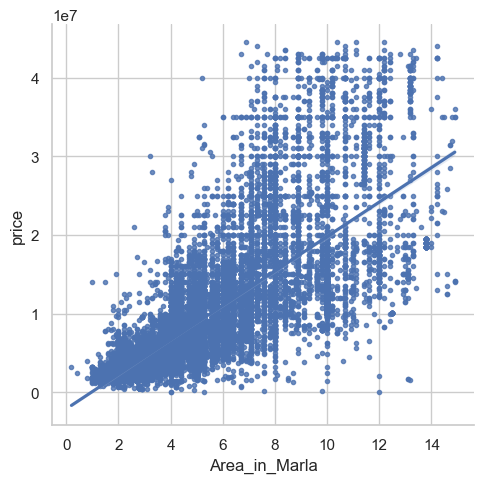

In [48]:
df_sale_flats = df_sale[(df_sale['Area_in_Marla'] < 15) & (df_sale['property_type'] == 'Flat')]
sns.lmplot(x='Area_in_Marla', y  = 'price', markers='.', data = df_sale_flats)

C:\Users\Adam\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


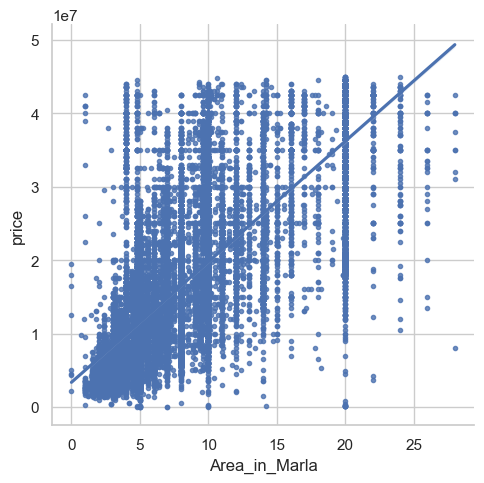

In [50]:
df_sale_houses = df_sale[(df_sale['Area_in_Marla'] < 30) & (df_sale['property_type'] == 'House')]
sns.lmplot(x='Area_in_Marla', y  = 'price', markers='.', data = df_sale_houses)